## H-G phase function  @python 3.8


In [14]:
#import
import numpy as np
import matplotlib.pyplot as plt
import math as mh 
import pandas as pd
from tqdm import tqdm
import os
Hv = 22
G  = 0.15

In [54]:
A1,A2 = 3.332,1.862
B1,B2 = 0.631,1.218
C1,C2 = 0.986,0.238
def calW(alpha):
    return np.exp(-90.56*np.tan(alpha/2)**2)
def calphiiS(i,alpha):
    Ci = C1
    if i == 2 :
        Ci = C2
    aa = 0.119+1.341*np.sin(alpha)-0.754*np.sin(alpha)**2
    return 1-Ci*np.sin(alpha)/aa
def calphiiL(i,alpha):
    Ai = A1
    Bi = B1
    if i == 2 :
        Ai = A2
        Bi = B2
    return np.exp(-Ai*np.tan(alpha/2)**Bi)
def calphii(i,alpha):
    W = calW(alpha)
    return W*calphiiS(i,alpha)+(1-W)*calphiiL(i,alpha)
def calHalpha(alpha,G,H):
    aa = (1-G)*calphii(1,alpha)+G*calphii(2,alpha)
    return H - 2.5*np.log(aa)
def calpromixHalpha(alpha,G,H):
    #print(f'phiL1={calphiiL(1,alpha)}')
    #print(f'phiL2={calphiiL(2,alpha)}')
    aa = (1-G)*calphiiL(1,alpha)+G*calphiiL(2,alpha)
    return H - 2.5*np.log(aa)
    

[0.         0.01805513 0.03611026 0.05416539 0.07222052 0.09027565
 0.10833078 0.12638591 0.14444104 0.16249617 0.1805513  0.19860643
 0.21666156 0.23471669 0.25277182 0.27082695 0.28888208 0.30693721
 0.32499234 0.34304747 0.3611026  0.37915773 0.39721286 0.41526799
 0.43332312 0.45137825 0.46943339 0.48748852 0.50554365 0.52359878]
[22.         22.36086758 22.55700081 22.71754835 22.85855076 22.98659222
 23.10518829 23.21649504 23.3219556  23.42259634 23.51918069 23.61229641
 23.70240864 23.78989383 23.87506239 23.95817436 24.03945058 24.11908085
 24.19723    24.27404252 24.34964613 24.42415459 24.49766994 24.57028427
 24.64208121 24.7131371  24.78352199 24.85330048 24.92253241 24.99127346]


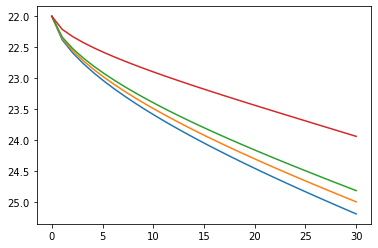

In [61]:
alpha_degree = np.linspace(0,30,30)
alpha = alpha_degree/180*np.pi
print(alpha)
Halpha = calpromixHalpha(alpha,0.15,22)
print(Halpha)

#print(f'hello={calpromixHalpha(6,0.15,22)}')
plt.gca().invert_yaxis()
plt.plot(alpha_degree,calpromixHalpha(alpha,0.1,22))
plt.plot(alpha_degree,calpromixHalpha(alpha,0.15,22))
plt.plot(alpha_degree,calpromixHalpha(alpha,0.2,22))
plt.plot(alpha_degree,calpromixHalpha(alpha,0.5,22))
